---

We study Lévy's construction of a Brownian motion.

---

In [1]:
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme("talk")
mpl.rcParams["figure.figsize"] = (8, 6)
SEED = 1234  # for reproducibility

$$    
    W_t^{(L)} := G_{0} S_0(t) 
    + 
    \sum_{j=0}^{L} \sum_{k=0}^{2^{j}-1}
    S_{2^j+k} (t) \, G_{2^j+k}

In [15]:
# TODO: code haar and schauder functions. Levy construction.

In [16]:
L = 2
N_L = 2 ** (L + 1)

In [42]:
def haar(j, t):
    "Compute the Haar function H_{2^j+k} for k=0,...,2^j-1 at time t."

    haar_functions = []

    for k in range(2**j):
        t_min = k / 2**j
        t_mid = (k + 0.5) / 2**j
        t_max = (k + 1) / 2**j
        haar_functions.append(
            2 ** (j / 2) * (t >= t_min) * (t < t_mid)
            - 2 ** (j / 2) * (t >= t_mid) * (t < t_max)
            + 0.0 * t
        )

    return haar_functions


def schauder(j, t):
    "Compute the Schauder function S_{2^j+k} for k=0,...,2^j-1 at time t."

    schauder_functions = []

    for k in range(2**j):
        t_min = k / 2**j
        t_mid = (k + 0.5) / 2**j
        t_max = (k + 1) / 2**j
        schauder_functions.append(
            2 ** (j / 2) * (t - t_min) * (t >= t_min) * (t < t_mid)
            + 2 ** (j / 2) * ((k + 1) / 2**j - t) * (t >= t_mid) * (t < t_max)
            + 0.0 * t
        )

    return schauder_functions

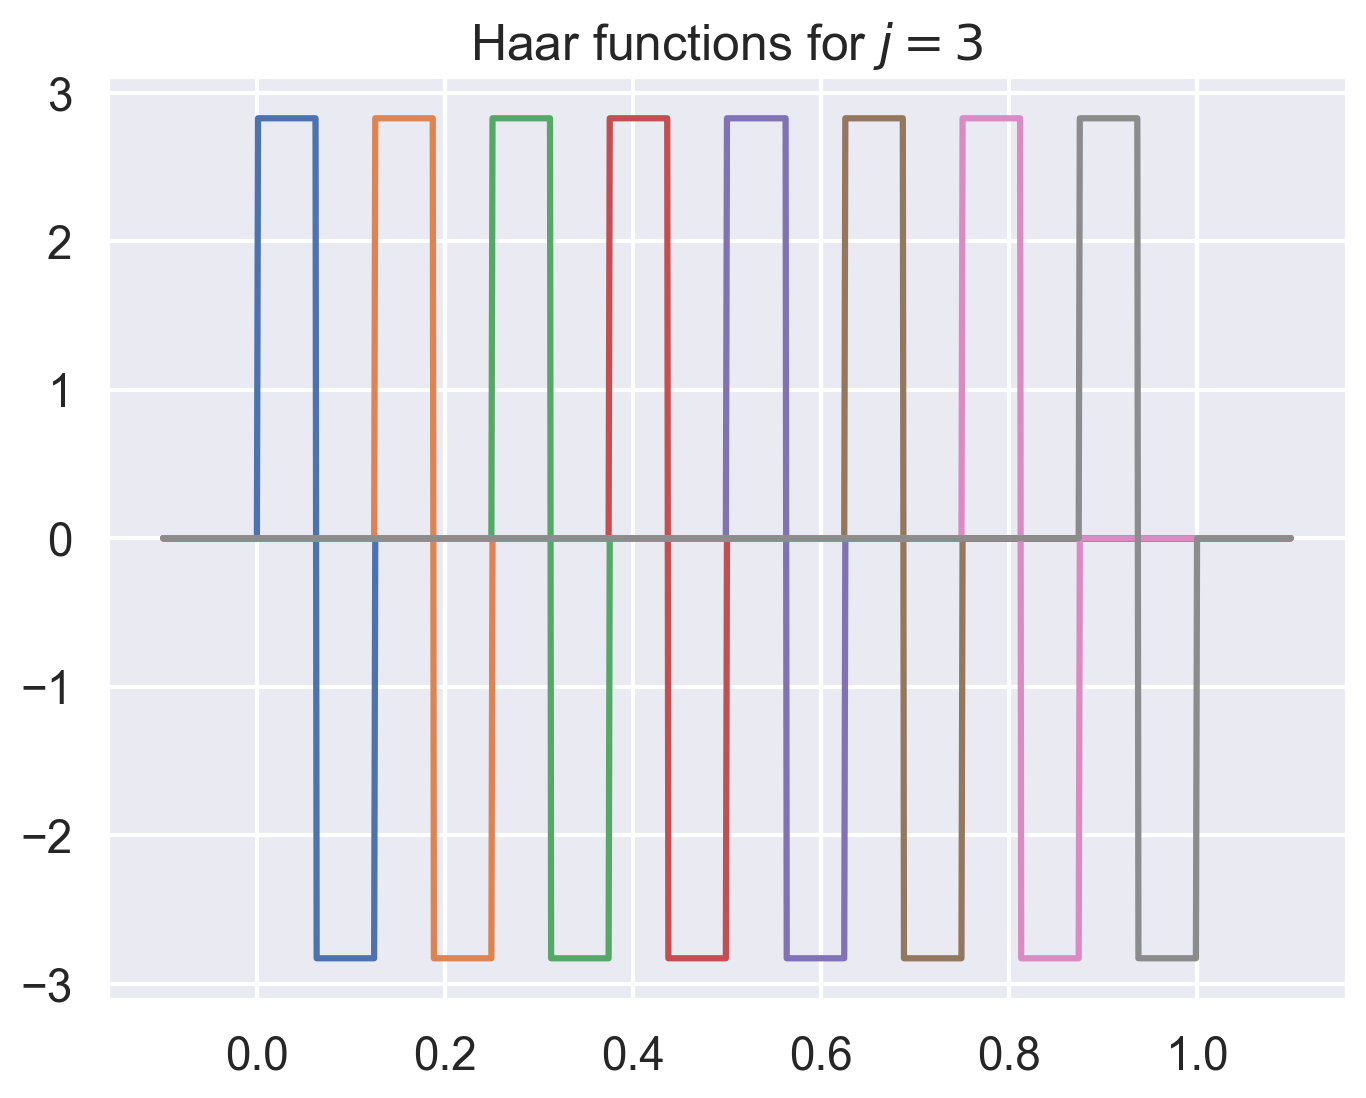

In [43]:
j = 3
tab_t = np.linspace(-0.1, 1.1, 1001)
haar_j = haar(j, tab_t)

fig, ax = plt.subplots()
for i in range(len(haar_j)):
    ax.plot(tab_t, haar_j[i], label=f"j={j}, k={i}")
ax.set_title(f"Haar functions for $j={j}$")
# ax.legend()
plt.show()

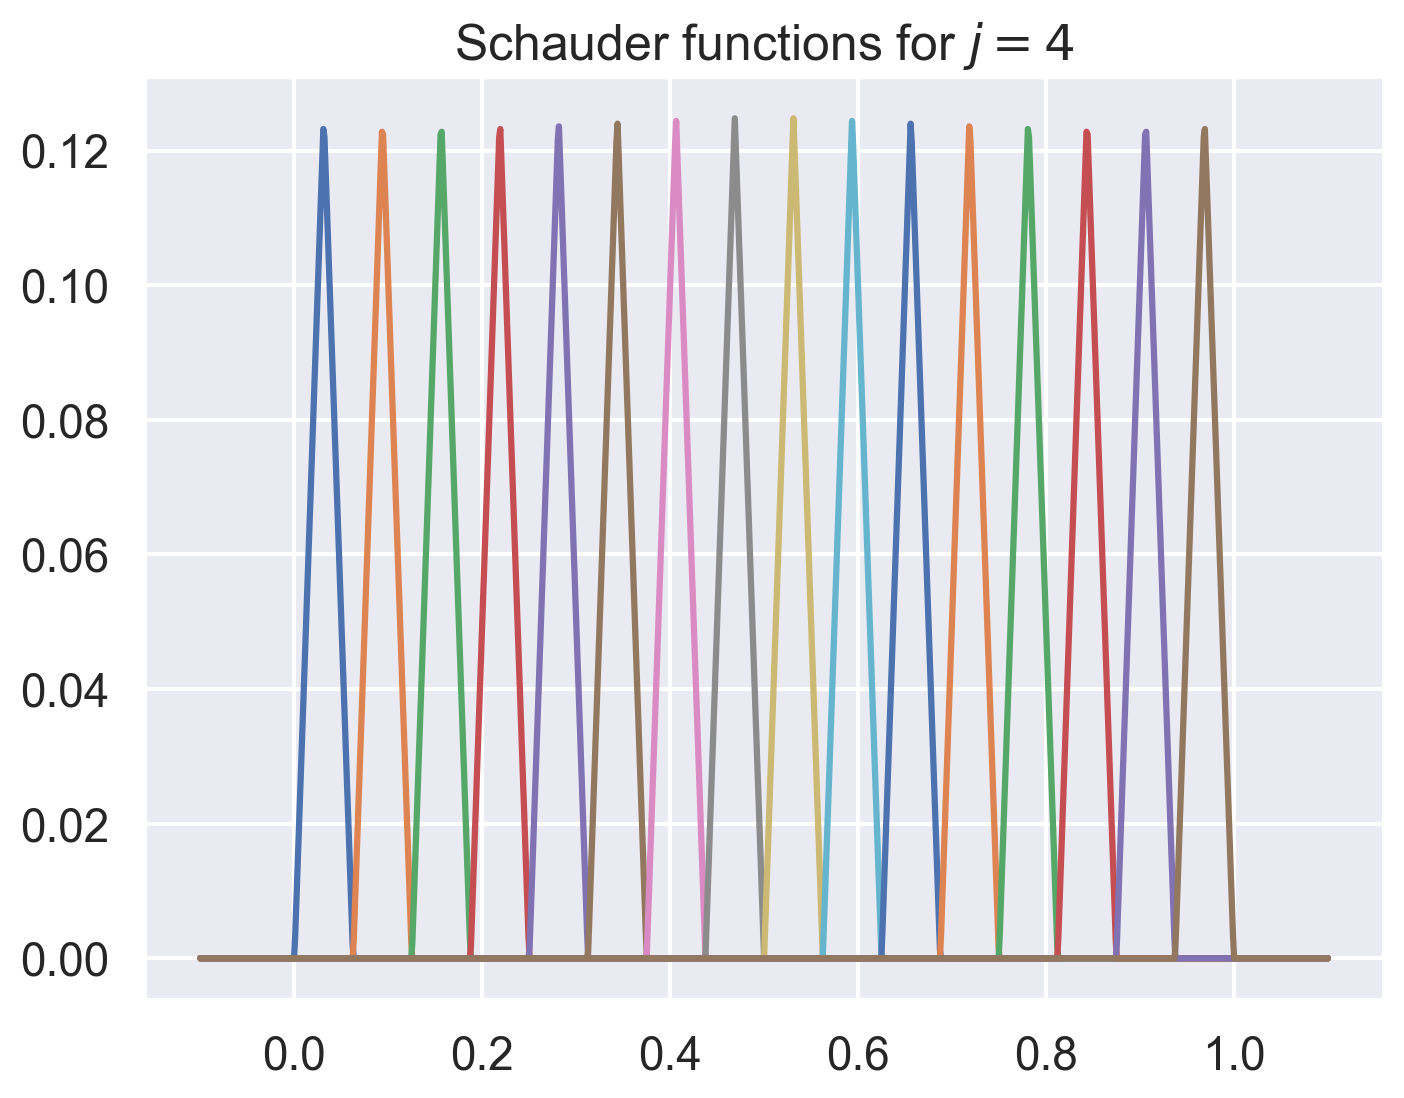

In [44]:
j = 4
tab_t = np.linspace(-0.1, 1.1, 1001)
schauder_j = schauder(j, tab_t)

fig, ax = plt.subplots()
for i in range(len(schauder_j)):
    ax.plot(tab_t, schauder_j[i], label=f"j={j}, k={i}")
ax.set_title(f"Schauder functions for $j={j}$")
# ax.legend()
plt.show()